**SE REQUIERE PRESENTAR UNA APROXIMACION ENTRE LA CALIDAD DE VIDA Y EL PIB PER CAPITA DE PAISES EN EL AÑO 2019**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model 

**Se asigna el dataset de OCDE 2019 a la variable OCDE2019**

In [ ]:
OCDE_2019 = pd.read_csv('https://raw.githubusercontent.com/danielordonezg/analisis-de-datos/main/ocde_2019.csv')
OCDE_2019.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


**DIMENSIONES DEL DATASET**

In [ ]:
OCDE_2019.shape

(2369, 17)


**NOMBRES DE LAS COLUMNAS**

In [ ]:
OCDE_2019.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

**CATEGORIAS UNICAS DE LA COLUMNA INEQUALITY**

In [ ]:
OCDE_2019['INEQUALITY'].unique()

array(['TOT', 'MN', 'WMN', 'HGH', 'LW'], dtype=object)

**SE REQUIERE QUE EL DATASET TENGA SOLAMENTE LA CATEGORIA TOT DE LA COLUMNA INEQUIALITY**

In [ ]:
OCDE_2019 = OCDE_2019[OCDE_2019['INEQUALITY'] == 'TOT']
OCDE_2019.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


**SE REQUIERE QUE LA COLUMNA COUNTRY QUEDE COMO INDEX**

In [ ]:
OCDE_2019 = OCDE_2019.pivot(index='Country', columns='Indicator', values='Value')
OCDE_2019.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,5.4,82.5,7.3,1.31,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,3.5,81.7,7.1,1.84,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,3.7,81.5,6.9,3.54,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,NaN,74.8,6.4,NaN,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,6.0,81.9,7.4,0.77,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


**SE IMPORTA EL DATASET Y SE LE ASIGNA A VARIABLE GDP_2019**

In [ ]:
GDP_2019 = pd.read_csv('https://raw.githubusercontent.com/danielordonezg/analisis-de-datos/main/gdp_per_capita_2019.csv')
GDP_2019.head()

,Series Name,Series Code,Country Name,Country Code,2019 [YR2019]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,507.103431871987
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,5353.2448564014
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,3973.96407191565
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,40886.3911648431


**DIMENSIONES DEL DATASET**

In [ ]:
GDP_2019.shape

(222, 5)

**NOMBRE DE LAS COLUMNAS DEL DATASET**

In [ ]:
GDP_2019.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2019 [YR2019]'],
      dtype='object')

**CAMBIAR COLUMNA 2019 POR GDP PER CAPITA Y QUE LA COLUMNA COUNTRY NAME SEA EL INDICE**

In [ ]:
GDP_2019.rename(columns={'2019 [YR2019]': 'GDP per capita'}, inplace=True)
GDP_2019.set_index('Country Name', inplace=True)
GDP_2019.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103431871987
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.2448564014
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.96407191565
American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,ASM,..
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.3911648431


**SE REQUIERE SABER LOS TIPOS DE DATOS DEL DATAFRAME**

In [ ]:
GDP_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Afghanistan to nan
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Series Name     219 non-null    object
 1   Series Code     217 non-null    object
 2   Country Code    217 non-null    object
 3   GDP per capita  217 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


**SE REQUIERE QUE LA COLUMNA DE GDP PER CAPITA SEA TIPO NUMERICO**

In [ ]:
GDP_2019['GDP per capita'] = GDP_2019['GDP per capita'].apply(pd.to_numeric, errors='coerce')
GDP_2019.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103432
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.244856
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.964072
American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,ASM,NaN
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.391165


**SE REQUIERE CONOCER EL TIPO DE DATO DE LA COLUMNA**

In [ ]:
GDP_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222 entries, Afghanistan to nan
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Series Name     219 non-null    object 
 1   Series Code     217 non-null    object 
 2   Country Code    217 non-null    object 
 3   GDP per capita  186 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.7+ KB


**SE REQUIERE QUE LA COLUMNA GDP PER CAPITAL TENGA UNICAMENTE 3 DECIMALES**

In [ ]:
decimales = 3
GDP_2019['GDP per capita'] = GDP_2019['GDP per capita'].apply(lambda x: round(x, decimales))
GDP_2019.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.245
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.964
American Samoa,GDP per capita (current US$),NY.GDP.PCAP.CD,ASM,NaN
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.391


**SE REQUIERE ELIMINAR LOS DATOS DESAPARECIDOS**

In [ ]:
GDP_2019.dropna(inplace=True)
GDP_2019.isna().sum()

Series Name       0
Series Code       0
Country Code      0
GDP per capita    0
dtype: int64

**SE REQUIEREN LAS PRIMERAS 5 FILAS**

In [ ]:
GDP_2019.head()

,Series Name,Series Code,Country Code,GDP per capita
Country Name,,,,
Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,AFG,507.103
Albania,GDP per capita (current US$),NY.GDP.PCAP.CD,ALB,5353.245
Algeria,GDP per capita (current US$),NY.GDP.PCAP.CD,DZA,3973.964
Andorra,GDP per capita (current US$),NY.GDP.PCAP.CD,AND,40886.391
Angola,GDP per capita (current US$),NY.GDP.PCAP.CD,AGO,2790.727


**SE REQUIERE FUSIONARL DATASET OCDE CON EL DATASET GDP CONSERVANDO SUS INDICES ORDENANDOLOS DE MAYOR A MENOR POR GDP**

In [ ]:
full_dataset = pd.merge(left=OCDE_2019, right=GDP_2019, left_index=True, right_index=True)
full_dataset.sort_values('GDP per capita', ascending=False, inplace=True)
full_dataset.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Series Name,Series Code,Country Code,GDP per capita
Luxembourg,12.0,0.5,77.0,3.82,66.0,75.8,0.6,39264.0,769053.0,21.0,1.7,82.8,6.9,2.35,63062.0,93.0,1.9,69.0,1.7,483.0,NaN,91.0,84.0,15.1,GDP per capita (current US$),NY.GDP.PCAP.CD,LUX,114704.594
Switzerland,15.0,0.1,88.0,0.37,80.0,85.3,0.6,37466.0,NaN,22.0,NaN,83.7,7.5,1.82,62283.0,93.0,1.9,78.0,2.3,506.0,NaN,49.0,95.0,17.5,GDP per capita (current US$),NY.GDP.PCAP.CD,CHE,81993.727
Ireland,7.0,1.0,82.0,5.25,67.0,75.9,0.7,25310.0,217130.0,20.0,7.8,81.8,7.0,3.23,47653.0,95.0,2.1,83.0,1.3,509.0,NaN,65.0,85.0,18.1,GDP per capita (current US$),NY.GDP.PCAP.CD,IRL,78660.956
Norway,5.0,0.0,82.0,2.93,74.0,90.1,0.4,35725.0,228936.0,17.0,NaN,82.5,7.6,0.66,51212.0,94.0,2.1,77.0,2.2,504.0,15.56,78.0,98.0,18.3,GDP per capita (current US$),NY.GDP.PCAP.CD,NOR,75419.635
Iceland,3.0,0.0,77.0,15.06,86.0,86.0,0.5,NaN,NaN,24.0,0.7,82.3,7.5,0.26,61787.0,98.0,1.6,76.0,2.1,481.0,NaN,79.0,99.0,19.0,GDP per capita (current US$),NY.GDP.PCAP.CD,ISL,66944.833


**SE REQUIEREN LOS NOMBRES DE LAS COLUMNAS**

In [ ]:
full_dataset.columns

Index(['Air pollution', 'Dwellings without basic facilities',
       'Educational attainment', 'Employees working very long hours',
       'Employment rate', 'Feeling safe walking alone at night',
       'Homicide rate', 'Household net adjusted disposable income',
       'Household net wealth', 'Housing expenditure',
       'Labour market insecurity', 'Life expectancy', 'Life satisfaction',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Rooms per person',
       'Self-reported health',
       'Stakeholder engagement for developing regulations', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education', 'Series Name', 'Series Code',
       'Country Code', 'GDP per capita'],
      dtype='object')

In [ ]:
full_dataset = full_dataset[['GDP per capita', 'Life satisfaction']]
full_dataset.head()

,GDP per capita,Life satisfaction
Luxembourg,114704.594,6.9
Switzerland,81993.727,7.5
Ireland,78660.956,7.0
Norway,75419.635,7.6
Iceland,66944.833,7.5


**SE MUESTRAN LOS DATOS ESTADISTICOS DEL DATAFRAME**

In [ ]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
GDP per capita,38.0,38736.624184,24631.143644,6001.401,19345.34025,40370.4045,51245.6815,114704.594
Life satisfaction,38.0,6.571053,0.754771,4.700,5.92500,6.6000,7.2750,7.600


**SE REQUIERE PREPARAR Y VISUALIZAR LOS DATOS DE 'GDP PER CAPITA' VS 'LIFE SATISFACTION'**

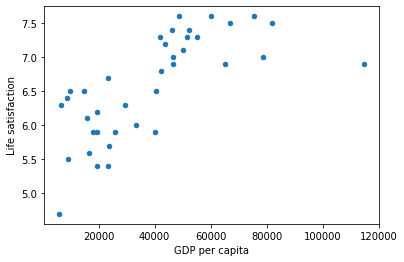

In [ ]:
X = np.c_[full_dataset['GDP per capita']]
y = np.c_[full_dataset['Life satisfaction']]

full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction')
plt.show()

**SE REQUIERE SABER CUAL ES LA SATISFACCION DE VIDA EN COLOMBIA**

In [ ]:
full_dataset[['GDP per capita', 'Life satisfaction']].loc['Colombia']

GDP per capita       6428.676
Life satisfaction       6.300
Name: Colombia, dtype: float64

**SE REQUIERE SABER CUAL ES LA SATISFACCION DE VIDA EN FRANCIA**

In [ ]:
full_dataset[['GDP per capita', 'Life satisfaction']].loc['France']

GDP per capita       40493.929
Life satisfaction        6.500
Name: France, dtype: float64

**SE REQUIERE GRAFICAR LOS DATOS DE GDP PER CAPITA EN RELACION A LIFE SATISFACTION**

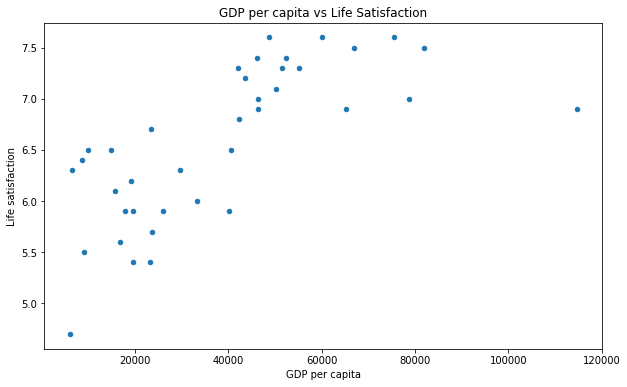

In [ ]:
full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction', figsize=(10,6))
plt.title('GDP per capita vs Life Satisfaction')
plt.show()

**SE REQUIERE MOSTRAR LOS DATOS DE LOS PAISES (LUXEMBURGO,COLOMBIA,FRANCE,HUNGARY,NORWAY)**

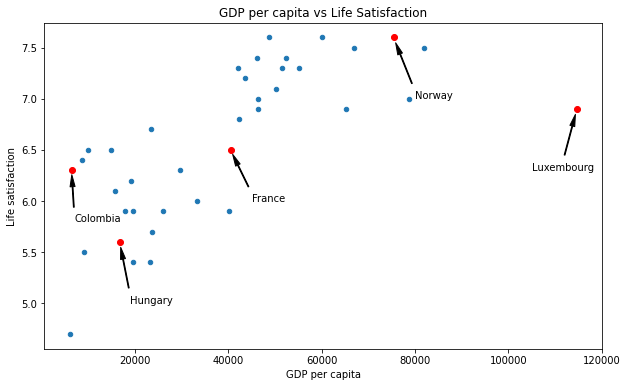

In [ ]:
full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction', figsize=(10,6))
texto_paises = {'Luxembourg': (105000, 6.3), 
                'Colombia':   (7000, 5.8),
                'France':     (45000, 6.0),
                'Hungary':    (19000, 5.0),
                'Norway':     (80000, 7.0)}

for country, pos_text in texto_paises.items():
  pos_x, pos_y = full_dataset.loc[country]
  plt.annotate(country, xy=(pos_x, pos_y), xytext=pos_text, 
               arrowprops=dict(facecolor='black', width=0.8, headwidth=5, shrink=0.1))
  plt.plot(pos_x, pos_y, 'ro') 

plt.title('GDP per capita vs Life Satisfaction')
plt.show()

**SE REQUIERE OBTENER INFORMACION DE LOS PAISES PRESENTES EN EL GRAFICO**

In [ ]:
full_dataset.loc[list(texto_paises.keys())]

,GDP per capita,Life satisfaction
Luxembourg,114704.594,6.9
Colombia,6428.676,6.3
France,40493.929,6.5
Hungary,16731.822,5.6
Norway,75419.635,7.6


**TRAZAR LINEA RECTA
Y=0.00005xX+0**

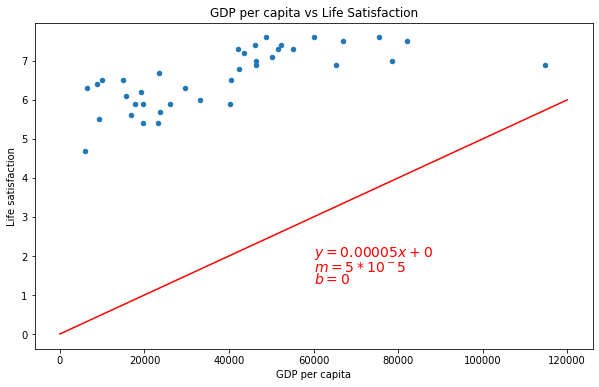

In [ ]:
full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction', figsize=(10,6))
plt.title('GDP per capita vs Life Satisfaction')
x = np.linspace(0, 120000)

plt.plot(x, 0.00005*x+0, 'r')
plt.text(60000, 2, '$y=0.00005x+0$', fontsize=14, color='r')
plt.text(60000, 1.6, '$m=5*10^-5$', fontsize=14, color='r')
plt.text(60000, 1.3, '$b=0$', fontsize=14, color='r')


plt.show()

**NOTEBOOK CON 3 LINEAS RECTAS ADICIONALES**

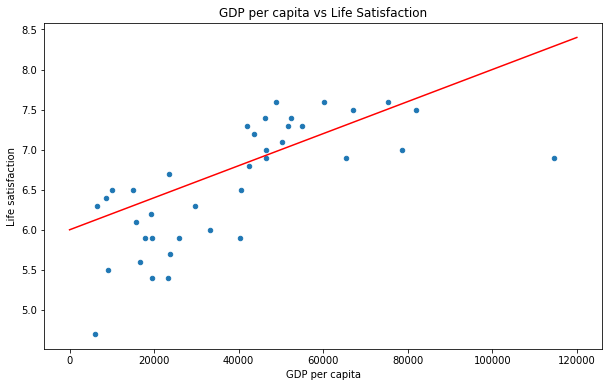

In [ ]:
full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction', figsize=(10,6))
plt.title('GDP per capita vs Life Satisfaction')
x = np.linspace(0, 120000)

plt.plot(x, 0.00002*x+6, 'r')


plt.show()

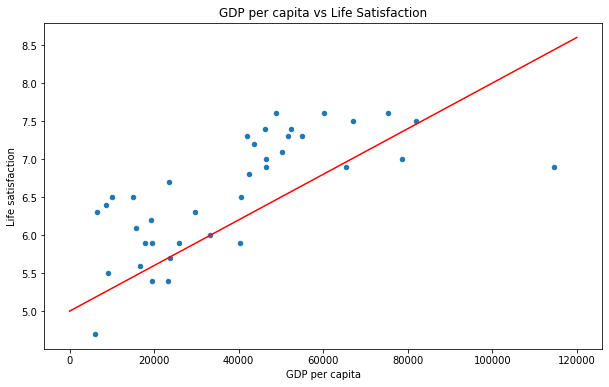

In [ ]:
full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction', figsize=(10,6))
plt.title('GDP per capita vs Life Satisfaction')
x = np.linspace(0, 120000)

plt.plot(x, 0.00003*x+5, 'r')


plt.show()

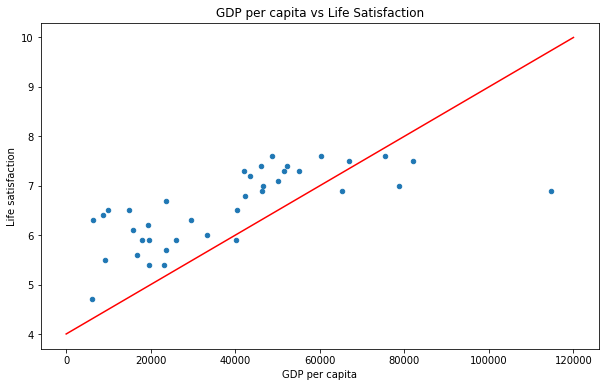

In [ ]:
full_dataset.plot(kind='scatter', x='GDP per capita', y = 'Life satisfaction', figsize=(10,6))
plt.title('GDP per capita vs Life Satisfaction')
x = np.linspace(0, 120000)

plt.plot(x, 0.00005*x+4, 'r')


plt.show()